In [243]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [244]:
csv_link="../dataset/dataset_color_prediction.csv"
csv_link="../dataset/sample.csv"

In [245]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [246]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dataframe=scaler.fit_transform(dataframe)
dataframe = pd.DataFrame(dataframe, columns = ['r1','g1','b1','r2','g2','b2','r3','g3','b3','r4','g4','b4'])

In [247]:
dataframe.head()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,0.937255,0.486275,0.556863,0.980392,0.909804,0.878431,0.713725,0.886275,0.827451,0.847059,0.654902,0.694118
1,0.909804,0.705882,0.721569,0.933333,0.839216,0.827451,0.643137,0.576471,0.576471,0.403922,0.349020,0.368627
2,0.984314,0.905882,0.776471,0.705882,0.972549,0.784314,0.627451,0.905882,0.898039,1.000000,0.682353,0.737255
3,0.019608,0.266667,0.368627,0.094118,0.603922,0.705882,0.458824,0.901961,0.854902,0.831373,0.945098,0.956863
4,0.905882,0.823529,0.800000,0.725490,0.717647,0.741176,0.525490,0.545098,0.556863,0.933333,0.929412,0.905882


In [248]:
input_sequence = dataframe.copy()
target_sequence = pd.DataFrame([input_sequence.pop(x) for x in ['r2','g2','b2','r3','g3','b3','r4','g4','b4']]).T


In [249]:
target_sequence

,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,0.980392,0.909804,0.878431,0.713725,0.886275,0.827451,0.847059,0.654902,0.694118
1,0.933333,0.839216,0.827451,0.643137,0.576471,0.576471,0.403922,0.349020,0.368627
2,0.705882,0.972549,0.784314,0.627451,0.905882,0.898039,1.000000,0.682353,0.737255
3,0.094118,0.603922,0.705882,0.458824,0.901961,0.854902,0.831373,0.945098,0.956863
4,0.725490,0.717647,0.741176,0.525490,0.545098,0.556863,0.933333,0.929412,0.905882
...,...,...,...,...,...,...,...,...,...
1995,0.901961,0.870588,0.827451,0.200000,0.529412,0.364706,0.854902,0.400000,0.313725
1996,0.921569,0.317647,0.368627,0.827451,0.752941,0.698039,0.043137,0.035294,0.035294
1997,0.184314,0.850980,0.937255,0.019608,0.701961,0.921569,0.917647,0.917647,0.901961
1998,0.000000,0.450980,0.360784,0.968627,0.529412,0.172549,0.709804,0.694118,0.674510


In [250]:
input_sequence

,r1,g1,b1
0,0.937255,0.486275,0.556863
1,0.909804,0.705882,0.721569
2,0.984314,0.905882,0.776471
3,0.019608,0.266667,0.368627
4,0.905882,0.823529,0.800000
...,...,...,...
1995,0.607843,0.556863,0.545098
1996,0.352941,0.568627,0.733333
1997,0.270588,0.380392,0.466667
1998,0.137255,0.101961,0.101961


In [251]:
input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], 1))
target_sequence = np.reshape(target_sequence, (2000,-1))


In [252]:
input_sequence.shape


(2000, 3, 1)

In [253]:
target_sequence.shape

(2000, 9)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(input_sequence, target_sequence, test_size=0.33)

In [255]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(300, activation='relu', input_shape=(input_sequence.shape[1], input_sequence.shape[2])))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dense(180))
model.add(tf.keras.layers.Dense(72))
model.add(tf.keras.layers.Dense(36))
model.add(tf.keras.layers.Dense(target_sequence.shape[1]))



In [256]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])



In [257]:
model.input_shape

(None, 3, 1)

In [258]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 300)               362400    
                                                                 
 dense_45 (Dense)            (None, 256)               77056     
                                                                 
 dense_46 (Dense)            (None, 180)               46260     
                                                                 
 dense_47 (Dense)            (None, 72)                13032     
                                                                 
 dense_48 (Dense)            (None, 36)                2628      
                                                                 
 dense_49 (Dense)            (None, 9)                 333       
                                                                 
Total params: 501,709
Trainable params: 501,709
Non-tr

In [259]:
input_sequence[3]

array([[0.01960784],
       [0.26666667],
       [0.36862745]])

In [260]:
# Train the model
history=model.fit(X_train, y_train, epochs=40, batch_size=32,
                    verbose=1,validation_data=(X_test,y_test))



Epoch 1/40
42/42 [==============================] - 3s 19ms/step - loss: 0.1318 - accuracy: 0.1679 - val_loss: 0.0870 - val_accuracy: 0.2379
Epoch 2/40
42/42 [==============================] - 1s 15ms/step - loss: 0.0892 - accuracy: 0.1933 - val_loss: 0.0863 - val_accuracy: 0.2485
Epoch 3/40
42/42 [==============================] - 1s 14ms/step - loss: 0.0886 - accuracy: 0.2291 - val_loss: 0.0849 - val_accuracy: 0.2227
Epoch 4/40
42/42 [==============================] - 1s 15ms/step - loss: 0.0891 - accuracy: 0.2254 - val_loss: 0.0865 - val_accuracy: 0.2167
Epoch 5/40
42/42 [==============================] - 1s 14ms/step - loss: 0.0895 - accuracy: 0.2239 - val_loss: 0.0871 - val_accuracy: 0.2379
Epoch 6/40
42/42 [==============================] - 1s 15ms/step - loss: 0.0885 - accuracy: 0.2179 - val_loss: 0.0853 - val_accuracy: 0.2439
Epoch 7/40
42/42 [==============================] - 1s 14ms/step - loss: 0.0884 - accuracy: 0.2239 - val_loss: 0.0865 - val_accuracy: 0.2439
Epoch 8/40
42

In [261]:
# Generate some test data
dara=[[223,158,114]]

test_input = np.array(dara)
scaled_input=scaler.fit_transform(dara)
predictions = model.predict(scaled_input)
predictions= predictions*255
# Print the predictions
print(predictions)

1/1 [==============================] - 0s 157ms/step
[[120.445015 106.2338   108.47843  136.55603  136.08406  148.18076
  160.68057  157.35555  153.51988 ]]


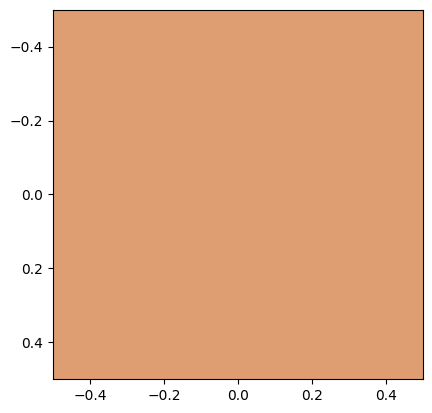

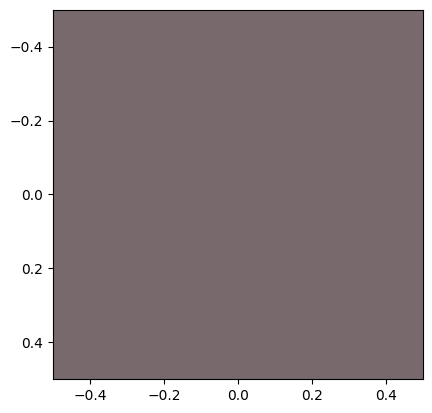

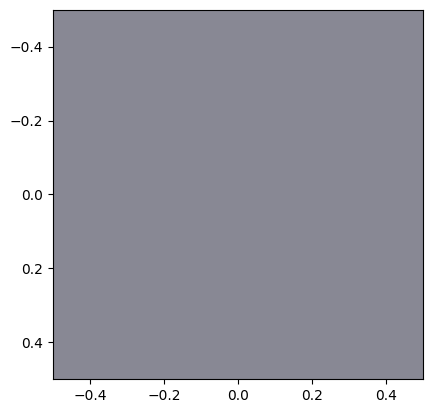

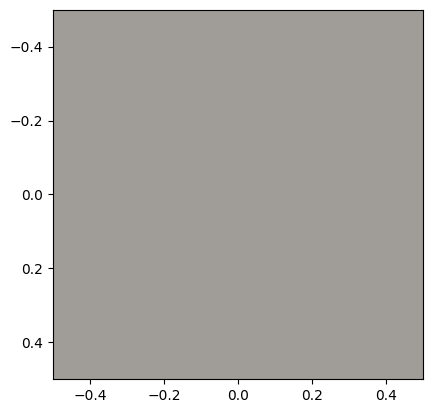

In [262]:
plt.imshow([[[x / 255 for x in test_input[0]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
plt.show()

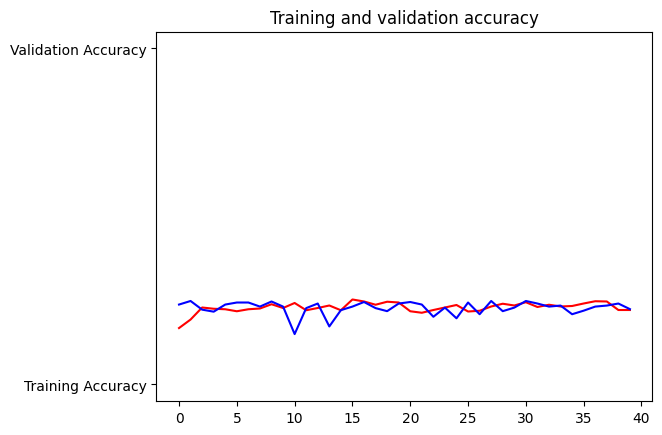

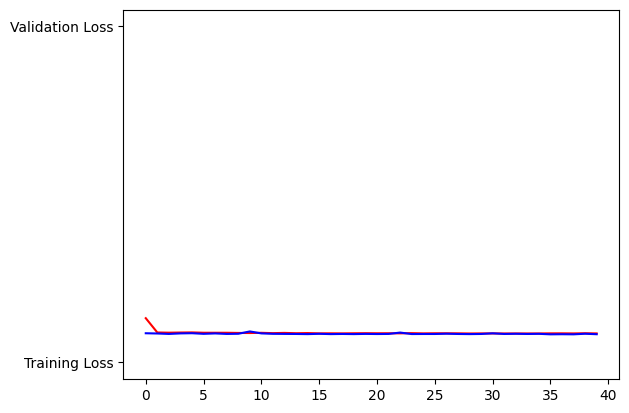

In [263]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()